In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

1.14.0


In [2]:
# Load the data
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [9]:
# x_train -> shape is N x 28 x 28
# y_train -> shape is N i.e. 1D vector
# x_test -> shape is Ntest x 28 x 28
# y_test -> shape is Ntest i.e. 1D vector as well.

In [10]:
# Building Our Model:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
# Compile the model:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Training the Model:
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 150us/sample - loss: 2.5642 - acc: 0.7431 - val_loss: 0.5429 - val_acc: 0.8627
Epoch 2/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.6069 - acc: 0.8360 - val_loss: 0.3935 - val_acc: 0.9110
Epoch 3/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4853 - acc: 0.8706 - val_loss: 0.3868 - val_acc: 0.9182
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4273 - acc: 0.8849 - val_loss: 0.2997 - val_acc: 0.9330
Epoch 5/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.4005 - acc: 0.8959 - val_loss: 0.2807 - val_acc: 0.9370
Epoch 6/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3648 - acc: 0.9036 - val_loss: 0.2700 - val_acc: 0.9421
Epoch 7/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3428 - acc: 0.9100 - val_l

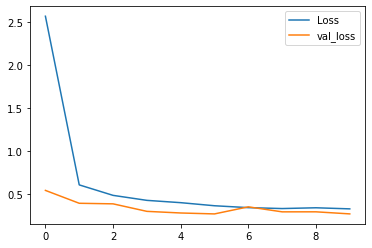

In [15]:
# Ploting Loss per Iteration:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

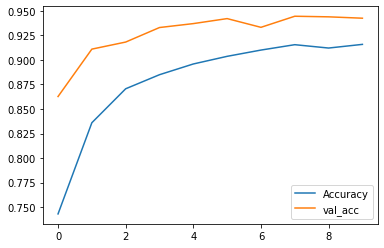

In [16]:
# Ploting Accuracy per Iteration:
plt.plot(r.history['acc'], label='Accuracy')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

**Accuracy of our model is high ranging from 90% to 95%**

In [17]:
# Evaluate the model:
print(model.evaluate(x_test,y_test))

10000/10000 [==============================] - 0s 43us/sample - loss: 0.2702 - acc: 0.9425
[0.2702299912534654, 0.9425]


Confusion matrix, without normalization
[[ 945    0    4    0    0    0    4    2   22    3]
 [   0 1117    1    4    1    2    2    0    8    0]
 [   2    2  943   27    2    2    5    5   42    2]
 [   0   10    8  921    0   51    0    4   14    2]
 [   1    5   27    0  914    0   12    1   10   12]
 [   3    5    1    6    0  840   11    0   22    4]
 [   5    2    2    0    3   12  919    0   15    0]
 [   1    6   13    8    3    1    0  968    9   19]
 [   4    3    3   13    4   11    3    1  921   11]
 [   2    6    1    2   21   16    0    7   17  937]]


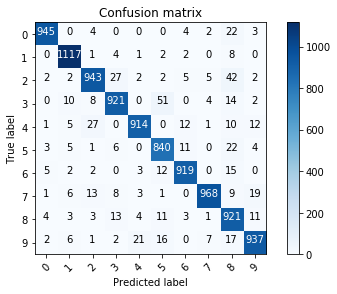

In [18]:
# Plot confusion matrix
# Kindly dont focus on the details of implementation of the code below
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

**Above, plotted Confussion Matrix in the form of heatmap represents the number of iterations when the numbers in the images of MNIST datset were wrongly identified and clssfied by our built Neural Nterwork.**

# Below we will randomly check the images(Numbers) which were wrognly identified and clssified by our NN Model:

Text(0.5, 1.0, 'True Label: 9 Predicted Label: 8')

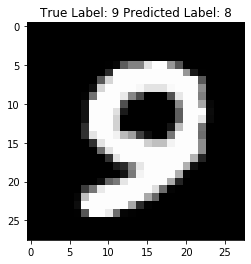

In [21]:
missclassified_img=np.where(p_test!=y_test)[0]
i = np.random.choice(missclassified_img)
plt.imshow(x_test[i], cmap='gray')
plt.title('True Label: %s Predicted Label: %s' %(y_test[i],p_test[i]))

**Here, We can clearfy infer that actual numeric: '9' has been missclassified and missidentified as numeric: '8'.**

Text(0.5, 1.0, 'True Label: 9 Predicted Label: 3')

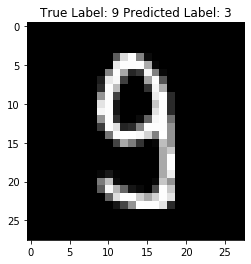

In [22]:
missclassified_img=np.where(p_test!=y_test)[0]
i = np.random.choice(missclassified_img)
plt.imshow(x_test[i], cmap='gray')
plt.title('True Label: %s Predicted Label: %s' %(y_test[i],p_test[i]))

**Here, We can clearfy infer that actual numeric: '9' has been missclassified and missidentified as numeric: '3'.**

Text(0.5, 1.0, 'True Label: 8 Predicted Label: 1')

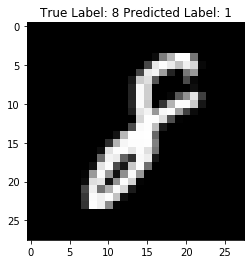

In [23]:
missclassified_img=np.where(p_test!=y_test)[0]
i = np.random.choice(missclassified_img)
plt.imshow(x_test[i], cmap='gray')
plt.title('True Label: %s Predicted Label: %s' %(y_test[i],p_test[i]))

**Here, We can clearfy infer that actual numeric: '8' has been missclassified and missidentified as numeric: '1'.**